# Comparing Clustering Algorithms

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('thyroid.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,Age
count,383.00
mean,40.87
std,15.13
min,15.00
25%,29.00
50%,37.00
75%,51.00
max,82.00


In [5]:
# stats of categorical data
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

if not categorical_columns.empty:
    categorical_description = df[categorical_columns].describe()
    print(round(categorical_description, 2))
else:
    print("No categorical columns found in the DataFrame.")

       Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
count     383     383        383             383              383   
unique      2       2          2               2                5   
top         F      No         No              No        Euthyroid   
freq      312     334        355             376              332   

       Physical Examination Adenopathy  Pathology   Focality Risk    T    N  \
count                   383        383        383        383  383  383  383   
unique                    5          6          4          2    3    7    3   
top     Multinodular goiter         No  Papillary  Uni-Focal  Low   T2   N0   
freq                    140        277        287        247  249  151  268   

          M Stage   Response Recurred  
count   383   383        383      383  
unique    2     5          4        2  
top      M0     I  Excellent       No  
freq    365   333        208      275  


## Handling Missing Data

In [6]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
def handle_missing_data(df):
    """
    Replaces NaN values in numerical columns with the mean of the respective columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns to handle missing data.
    
    Returns:
    pd.DataFrame: A DataFrame with missing numerical data replaced by column means.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numerical_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    
    return df

df = handle_missing_data(df)

# Label Encoding

In [8]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [10]:
def encode_categorical_columns(df):
    """
    Encodes all categorical columns in the DataFrame using LabelEncoder.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with categorical columns to be encoded.
    
    Returns:
    pd.DataFrame: A DataFrame with all categorical columns encoded.
    """
    enc = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        df[column] = enc.fit_transform(df[column])
    
    return df

# Encode the categorical columns
df = encode_categorical_columns(df)

# Checking the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int32
 2   Smoking               383 non-null    int32
 3   Hx Smoking            383 non-null    int32
 4   Hx Radiothreapy       383 non-null    int32
 5   Thyroid Function      383 non-null    int32
 6   Physical Examination  383 non-null    int32
 7   Adenopathy            383 non-null    int32
 8   Pathology             383 non-null    int32
 9   Focality              383 non-null    int32
 10  Risk                  383 non-null    int32
 11  T                     383 non-null    int32
 12  N                     383 non-null    int32
 13  M                     383 non-null    int32
 14  Stage                 383 non-null    int32
 15  Response              383 non-null    int32
 16  Recurred

In [12]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [13]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


# Data Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
# Select relevant features for clustering
all_features = df.columns
selected_features = []
X = df[all_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA

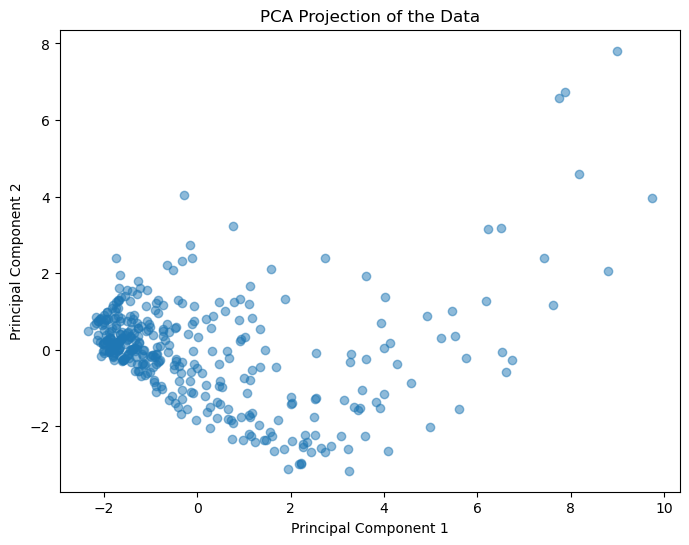

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Algorithms

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [18]:
# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Custom scorer for Davies-Bouldin score
def davies_bouldin_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return -davies_bouldin_score(X, labels)  # Negative because GridSearchCV maximizes the score

In [19]:
kmeans_params = {
    'n_clusters': range(2, 7),
    'init': ['k-means++'],
    'n_init': [10, 20, 30]
}

kmeans = KMeans(random_state=42)
kmeans_grid = GridSearchCV(kmeans, kmeans_params, scoring=silhouette_scorer, cv=5)
kmeans_grid.fit(X_pca)

print("Best KMeans parameters:", kmeans_grid.best_params_)
print("Best KMeans silhouette score:", kmeans_grid.best_score_)

Best KMeans parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 20}
Best KMeans silhouette score: 0.6101418833319702


In [20]:
dbscan_params = {
  'eps': np.arange(0.1, 1.1, 0.1),
  'min_samples': range(2, 11),
}

dbscan = DBSCAN()
dbscan_grid = GridSearchCV(dbscan, dbscan_params, scoring=silhouette_scorer, cv=5)
dbscan_grid.fit(X_pca)

print("Best DBSCAN parameters:", dbscan_grid.best_params_)
print("Best DBSCAN silhouette score:", dbscan_grid.best_score_)

Best DBSCAN parameters: {'eps': 1.0, 'min_samples': 3}
Best DBSCAN silhouette score: 0.6278105139849324


In [21]:
agg_params = {
    'n_clusters': range(2, 7),
    'linkage': ['ward', 'complete', 'average'],
    'affinity': ['euclidean', 'manhattan'],
}

agg = AgglomerativeClustering()
agg_grid = GridSearchCV(agg, agg_params, scoring=silhouette_scorer, cv=5)
agg_grid.fit(X_pca)

print("Best Agglomerative Clustering parameters:", agg_grid.best_params_)
print("Best Agglomerative Clustering silhouette score:", agg_grid.best_score_)

Best Agglomerative Clustering parameters: {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 2}
Best Agglomerative Clustering silhouette score: 0.6825894126828951


In [22]:
spectral_params = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['rbf', 'nearest_neighbors'],
    'gamma': [0.1, 0.5, 1.0],
    'assign_labels': ['kmeans', 'discretize'],
}

spectral = SpectralClustering(random_state=42)
spectral_grid = GridSearchCV(spectral, spectral_params, scoring=silhouette_scorer, cv=5)
spectral_grid.fit(X_pca)

print("Best Spectral Clustering parameters:", spectral_grid.best_params_)
print("Best Spectral Clustering silhouette score:", spectral_grid.best_score_)

Best Spectral Clustering parameters: {'affinity': 'rbf', 'assign_labels': 'kmeans', 'gamma': 0.5, 'n_clusters': 2}
Best Spectral Clustering silhouette score: 0.6230663860414462


In [23]:
# Set a global random seed
np.random.seed(42)

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Define clustering algorithms and parameters
algorithms = {
    'KMeans': KMeans(**kmeans_grid.best_params_),
    'DBSCAN': DBSCAN(**dbscan_grid.best_params_),
    'AgglomerativeClustering': AgglomerativeClustering(**agg_grid.best_params_),
    'SpectralClustering': SpectralClustering(**spectral_grid.best_params_),
}

# Evaluate clustering performance
results = []
for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, labels)
        davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
        results.append({'Algorithm': name, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin_avg})
    except Exception as e:
        results.append({'Algorithm': name, 'Silhouette Score': 'Error: ' + str(e), 'Davies-Bouldin Score': 'Error: ' + str(e)})

# Print results
df_results = pd.DataFrame(results)
print(df_results)

                 Algorithm  Silhouette Score  Davies-Bouldin Score
0                   KMeans          0.612046              0.769963
1                   DBSCAN          0.650008              0.732685
2  AgglomerativeClustering          0.703319              0.446254
3       SpectralClustering          0.721881              0.297029
